In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme()

from sklearn import cluster, datasets, mixture
import sklearn


# models
from sklearn.cluster import KMeans

# metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [2]:
df = pd.read_csv("../../data/after_fe_data.csv")

## KMEANS

### Choosing number of clusters  

In [5]:
def metrics_plots(df, max_k):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(-1 * kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        ax[i//2, i%2].plot(x_ticks, list_scores[i])
        ax[i//2, i%2].set_title(list_title[i])
        ax[i//2, i%2].set_xlabel('Number of clusters')
        ax[i//2, i%2].set_ylabel('Score')
    plt.tight_layout()
    plt.show()

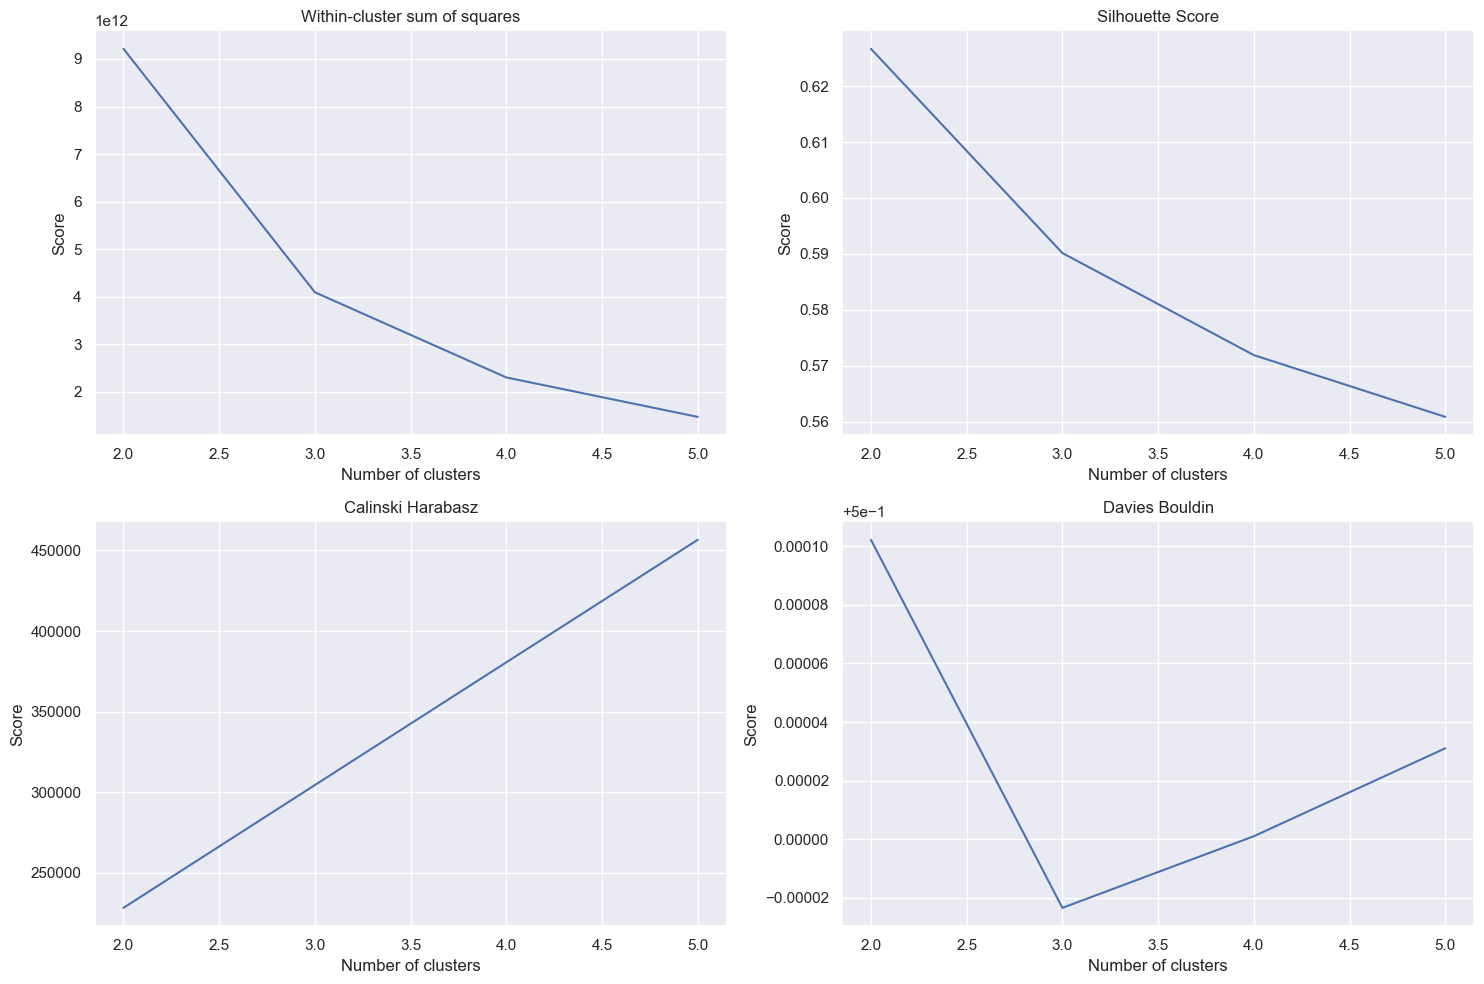

In [6]:
metrics_plots(df, 6)

### Implementing kmeans for 3 clusters

In [8]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

### Visualizations

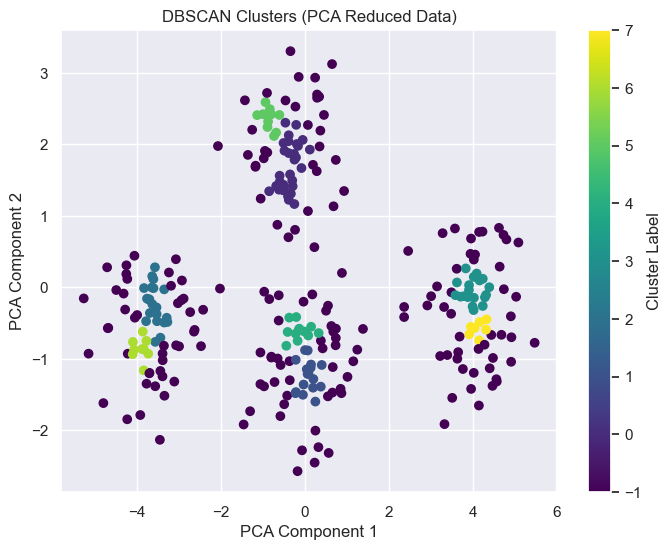

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clusters (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## minibatch

In [ ]:
miniBatch = cluster.MiniBatchKMeans(4)
miniBatch.fit(df)

### Visualizations

## DBSCAN

### choosing minPts ans eps parameters

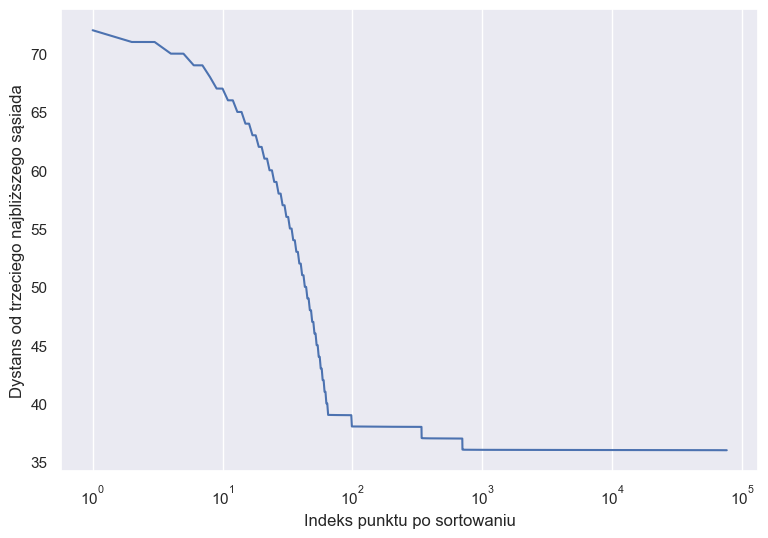

In [19]:
minPts = 72 # doubled number of dimentions

nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

sth around 38 seems to be ok

In [20]:
eps = 38
dbs = cluster.DBSCAN(eps=eps, min_samples=minPts)
dbs.fit(df)

DBSCAN(eps=38, min_samples=72)

In [21]:
set(dbs.labels_)

{0, 1, 2, 3, 4}

### Visualization

## GMM